In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/LBNL_file.csv', low_memory=False)



In [2]:
df.columns

Index(['data_provider_1', 'data_provider_2', 'system_ID_1', 'system_ID_2',
       'installation_date', 'system_size_DC', 'total_installed_price',
       'rebate_or_grant', 'customer_segment', 'expansion_system',
       'multiple_phase_system', 'new_construction', 'tracking',
       'ground_mounted', 'zip_code', 'city', 'state',
       'utility_service_territory', 'third_party_owned', 'installer_name',
       'self_installed', 'azimuth_1', 'azimuth_2', 'azimuth_3', 'tilt_1',
       'tilt_2', 'tilt_3', 'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules', 'technology_module_1',
       'technology_module_2', 'technology_module_3', 'BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'nameplate_capacity_module_1',
       'nameplate_capaci

35054

In [2]:

df = df[df['total_installed_price'] != -9999]

df = df[df['system_size_DC'] != -9999]

df['installation_year'] = pd.to_datetime(df['installation_date']).dt.year



In [3]:
df2 = pd.DataFrame()

df['price_per_dc'] = df['total_installed_price'] / df['system_size_DC']

df2['installation_year'] = df['installation_year']
df2['average_price'] = df.groupby(df['installation_year'])['total_installed_price'].transform('mean')
df2['median_system_size'] = df.groupby(df['installation_year'])['system_size_DC'].transform('mean')
df2['average_system_size'] = df.groupby(df['installation_year'])['system_size_DC'].transform('median')
df2['median_price_per_kW'] =  df.groupby(df['installation_year'])['price_per_dc'].transform('median')

counts = df2.value_counts('installation_year')
counts.name = 'systems_installed'
df2.drop_duplicates(inplace=True)
df2 = df2.merge(counts, left_on='installation_year', right_index=True)
df2.sort_values('installation_year', inplace=True)

df2.set_index('installation_year', inplace=True)

df2


,average_price,median_system_size,average_system_size,median_price_per_kW,systems_installed
installation_year,,,,,
1998,19572.037500,2.273860,2.22300,9644.377111,12
1999,25864.112807,3.190084,2.50680,8563.074353,57
2000,27096.093494,3.366890,2.67840,8480.808903,83
2001,30446.105849,3.556713,2.86200,8308.561562,730
2002,36629.288135,4.287222,2.96382,8465.012006,1346
2003,51209.775202,7.325568,3.30000,7807.649832,2009
2004,57700.268309,8.041898,3.96000,7440.393360,3490
2005,66015.373370,9.615082,4.10000,7280.423280,3101
2006,64879.855970,9.077547,4.36800,7569.927807,5139


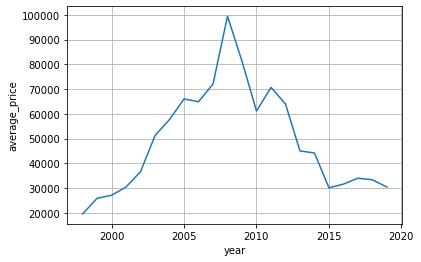

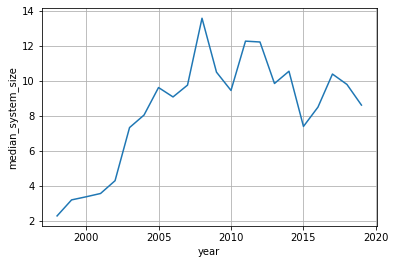

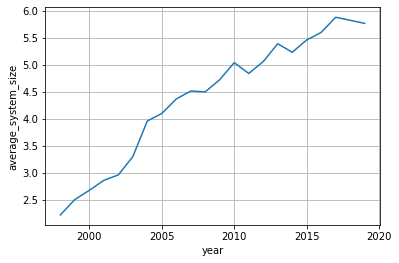

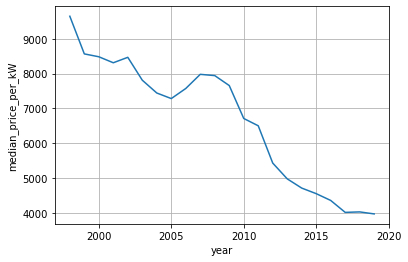

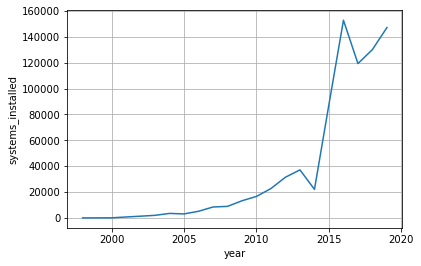

In [255]:
def plot_graph(y):
    fig, ax = plt.subplots()

    ax.set(xlabel='year', ylabel=y.name)
    ax.grid()


    plt.plot(df2.index, y)


for col in df2.columns:
    plot_graph(df2[col])
